In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
city = pd.read_csv('data/cities_by_day.csv')

In [4]:
city.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  C6H6        23908 non-null  float64
 12  C7H8        21490 non-null  float64
 13  C8H10       11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
city.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
city.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
C6H6          float64
C7H8          float64
C8H10         float64
AQI           float64
AQI_Bucket     object
dtype: object

We have 3 object and 13 float variables
Here the noticable thing is Date is of datetime and AQI_Bucket is of category

In [8]:
city['Date'] = pd.to_datetime(city['Date'])
city['AQI_Bucket'] = city['AQI_Bucket'].astype('category')

In [9]:
f'The available data is between {city.Date.min()} to {city.Date.max()}'

'The available data is between 2015-01-01 00:00:00 to 2020-07-01 00:00:00'

In [10]:
city.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
C6H6                 float64
C7H8                 float64
C8H10                float64
AQI                  float64
AQI_Bucket          category
dtype: object

In [11]:
city.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [12]:
import missingno as msno

#### Visualizing null values in each column

<AxesSubplot:>

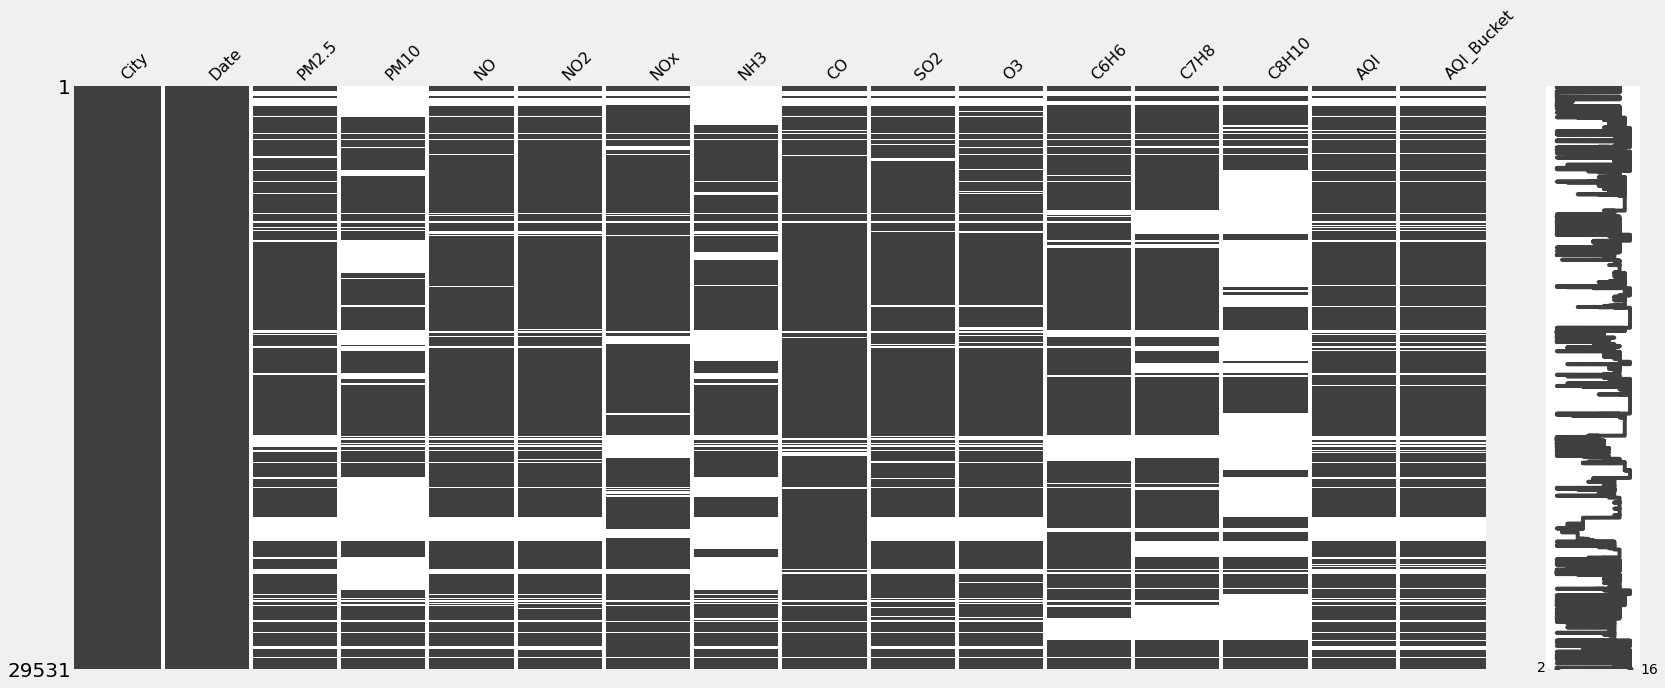

In [13]:
msno.matrix(city)

In [14]:
def missing_val_table(df):
    mis_val = df.isnull().sum()
    mis_val_perc = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_perc], axis=1)
    mis_val_table = mis_val_table.rename(columns = {0:'Missing Values', 1:'% of Total Values'})
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending = False).round(1)
    return mis_val_table

missing_values = missing_val_table(city)
missing_values.style.background_gradient(cmap='Reds')

,Missing Values,% of Total Values
C8H10,18109,61.300000
PM10,11140,37.700000
NH3,10328,35.000000
C7H8,8041,27.200000
C6H6,5623,19.000000
AQI,4681,15.900000
AQI_Bucket,4681,15.900000
PM2.5,4598,15.600000
NOx,4185,14.200000
O3,4022,13.600000


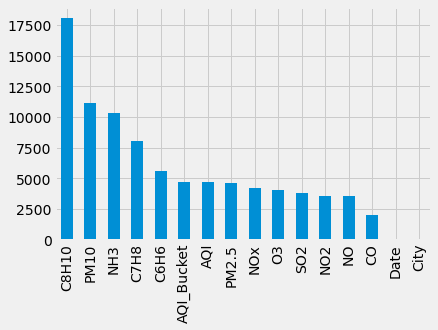

In [15]:
# C8H10 has maximum null values
city.isna().sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [16]:
# Null values in every city
city.AQI.isnull().groupby(city['City']).sum().sort_values(ascending=False)

City
Mumbai                1234
Ahmedabad              675
Patna                  399
Jorapokhar             398
Visakhapatnam          291
Talcher                227
Gurugram               226
Brajrajnagar           225
Hyderabad              126
Chennai                125
Lucknow                116
Amaravati              110
Shillong               105
Bengaluru               99
Amritsar                95
Thiruvananthapuram      60
Kolkata                 60
Coimbatore              42
Jaipur                  20
Bhopal                  11
Delhi                   10
Ernakulam                9
Guwahati                 7
Chandigarh               5
Kochi                    4
Aizawl                   2
Name: AQI, dtype: int64

In [17]:
num_cols = city.select_dtypes(include='float64').columns
pollutants = num_cols[:-1]

In [18]:
def remove_outliers(column):
    q1, q3 = np.percentile(city[column], [25,75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    city[column] = city[column].apply(lambda x:lower if x<lower else upper if x>upper else x)

def fill_na(column):
    city[column].fillna(city[column].mean(), inplace=True)

In [19]:
# for column in  pollutants:
for column in  pollutants:
    remove_outliers(column)
    fill_na(column)

In [20]:
city.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
C6H6             0
C7H8             0
C8H10            0
AQI           4681
AQI_Bucket    4681
dtype: int64

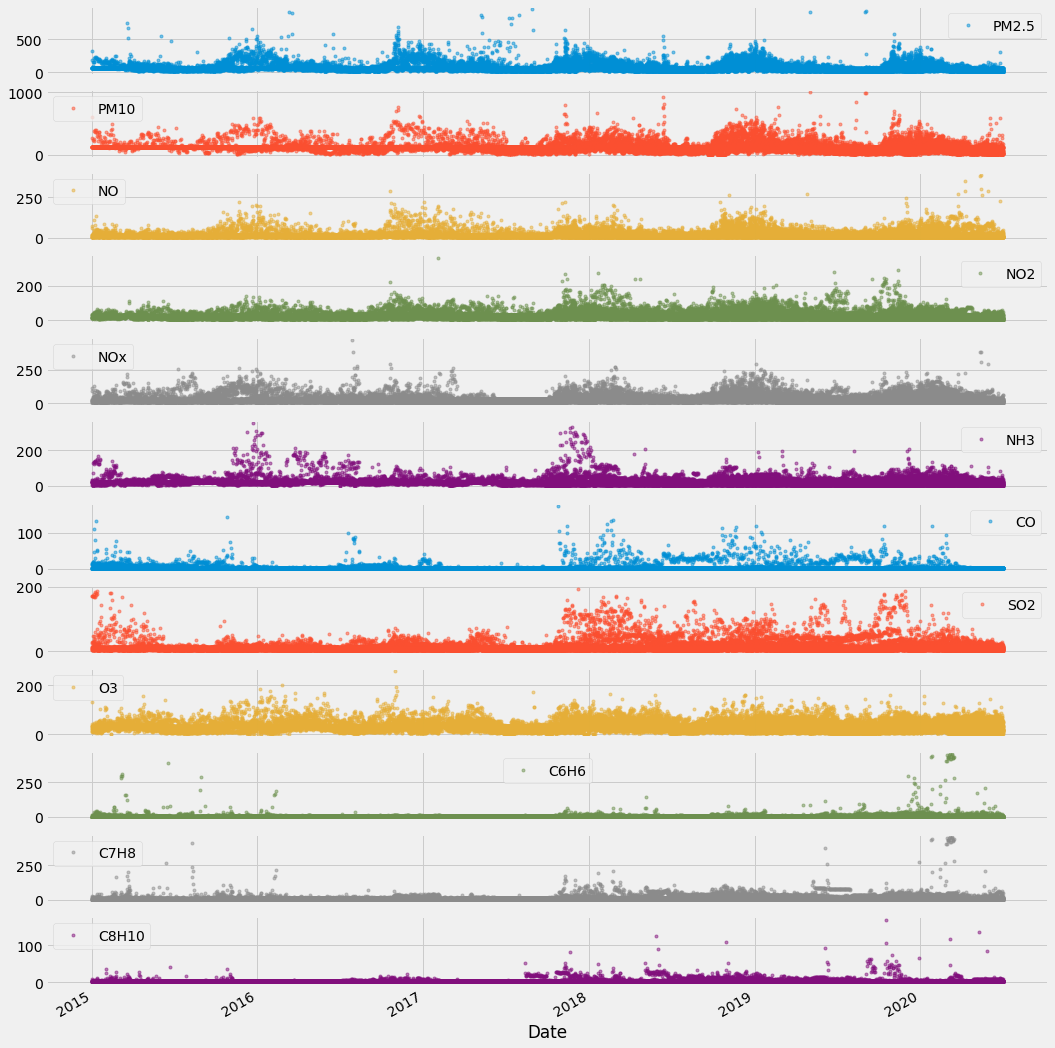

In [21]:
ax = city.set_index('Date')[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)

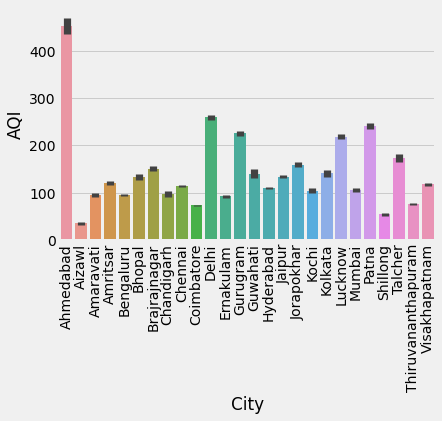

In [22]:
# Air quality index in each city
# AQI of Ahemdabad has wrong observations 
sns.barplot(x='City', y='AQI', data=city)
plt.xticks(rotation=90);

#### Top 10 most Polluted Cities
Here Ahmedabad is the outlier

<AxesSubplot:xlabel='City'>

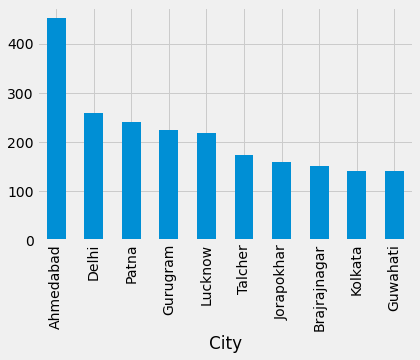

In [23]:
city.groupby('City').AQI.mean().sort_values(ascending=False)[:10].plot(kind='bar')

#### Most of the records have moderate and Satisfactory Air Quality Index

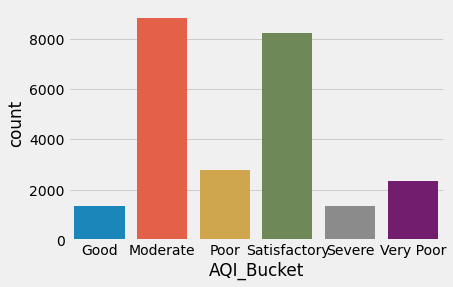

In [24]:
sns.countplot(x='AQI_Bucket', data=city)
plt.show()

<AxesSubplot:>

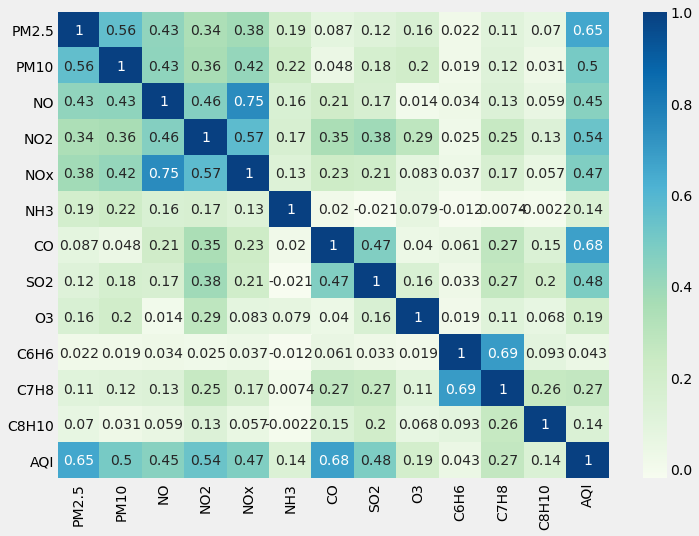

In [25]:
plt.figure(figsize=(11,8))
sns.heatmap(city.corr(), annot=True, cmap='GnBu')

PM2.5 and CO has a strong correlation with AQI

PM2.5, PM10, NO, NO2, Nox, CO, SO2

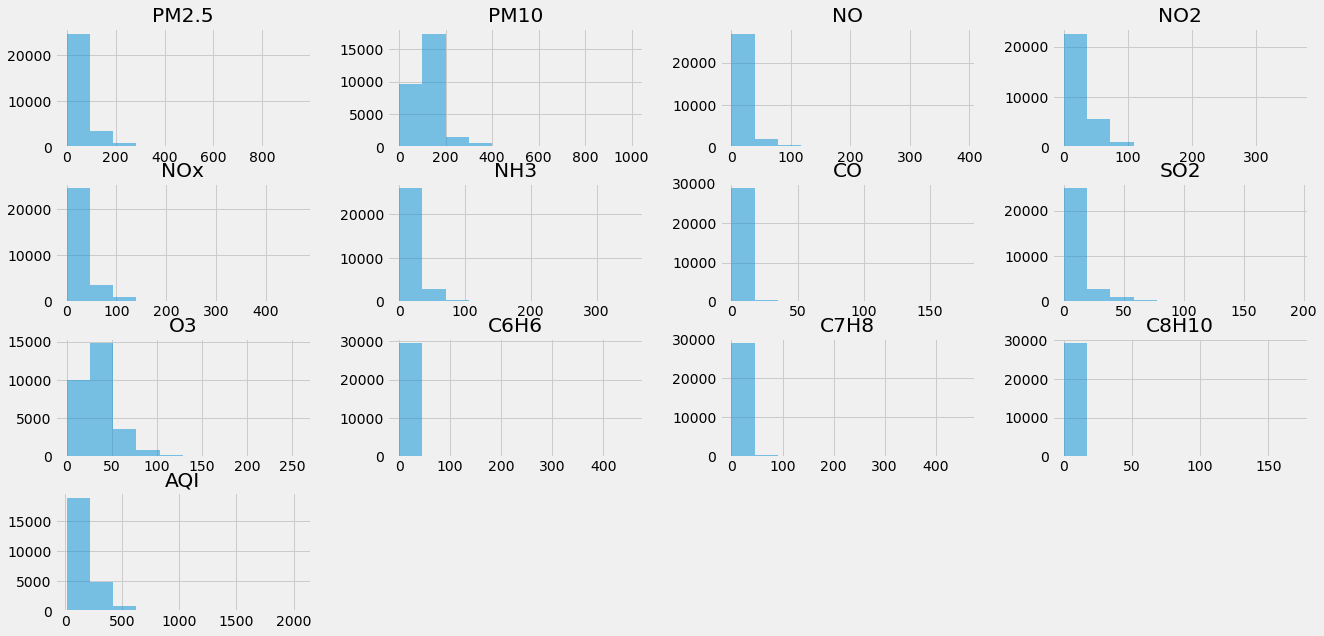

In [26]:
city.hist(alpha=0.5, figsize=(20, 10))
plt.show()

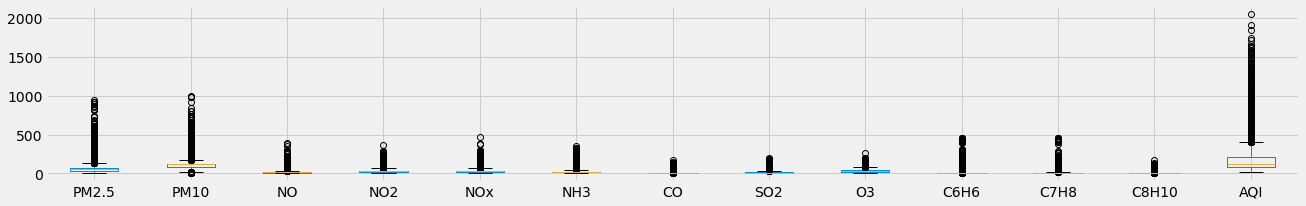

In [27]:
city.boxplot(figsize=(20,3))
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler

df = MinMaxScaler().fit_transform(city[pollutants])
df1 = pd.DataFrame(df, columns=pollutants)

In [29]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10
0,0.070962,0.118118,0.002304,0.050276,0.036674,0.06652,0.005233,0.142533,0.517422,0.000000,0.000044,0.000000
1,0.070962,0.118118,0.002432,0.043291,0.035199,0.06652,0.005517,0.126593,0.132120,0.008087,0.012092,0.022128
2,0.070962,0.118118,0.044489,0.053258,0.063512,0.06652,0.098970,0.149910,0.119083,0.014944,0.036056,0.013207
3,0.070962,0.118118,0.004300,0.050994,0.038428,0.06652,0.009670,0.095847,0.139958,0.009736,0.022293,0.005870
4,0.070962,0.118118,0.056520,0.059111,0.080748,0.06652,0.125704,0.202837,0.152491,0.015406,0.041530,0.016317


In [30]:
df1['AQI'] = city['AQI']
df1.dropna(subset=['AQI'], inplace=True)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [32]:
X=df1[pollutants]
y=df1['AQI']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
X_test.shape, y_test.shape

((6213, 12), (6213,))

In [36]:
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

y1_pred = model.predict(X_test)
r2_score(y_test, y1_pred)

0.8939316712979112

In [37]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = reg.predict(X_test)

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.820337194231395

In [40]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred)
np.sqrt(rmse)

57.66432801852926

In [41]:
reg.coef_

array([1064.30778966,  286.98717587,  -53.79265276,   90.98549096,
         47.93553685,  -21.55000725, 2050.92367393,  136.27453407,
         53.70804225,   15.3422655 ,  -17.58426997,  -21.79370125])

In [42]:
reg.intercept_

6.551675738868937

In [43]:
r2_train = reg.score(X_train, y_train)
r2_train

0.8585300926540187

In [44]:
r2_test = reg.score(X_test, y_test)
r2_test

0.820337194231395

In [45]:
y_pred

array([113.93037398, 200.88778246, 116.05556914, ..., 119.09137037,
       121.06139206,  86.74012004])

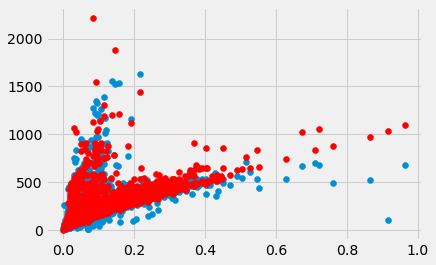

In [46]:
plt.scatter(X_test.iloc[:,0], y_test)
plt.scatter(X_test.iloc[:,0], y_pred, c='r')
plt.show()

In [47]:
city.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
C6H6             0
C7H8             0
C8H10            0
AQI           4681
AQI_Bucket    4681
dtype: int64

In [48]:
model.fit(X,y)
city['AQI'] = model.predict(city[pollutants])

In [49]:
from collections import Counter
df = city.dropna(subset=['AQI_Bucket'])
X = df.AQI.values.reshape(-1,1)
y = df.AQI_Bucket
counter = Counter(y)
counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.43569934009335265